In [74]:
import cantera as ct
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

def shock_tube_sensitivity_calculation(temperature=None,
                                       pressure=None,
                                       conditions={},
                                       mechanicalBoundary='constant pressure',
                                       cti='',
                                       initialTime=None,
                                       finalTime=None,
                                       observables=[],
                                       kineticSens=1):

    #self.timeHistory = None
    #self.kineticSensitivities= None #3D numpy array, columns are reactions with timehistories, depth gives the observable for those histories
    #mechanicalBoundary = conditions[1]
        #same solution for both cp and cv sims
    gas = ct.Solution(cti)
    gas.TPX = temperature,pressure,conditions
    
    if mechanicalBoundary == 'constant pressure':
        shockTube = ct.IdealGasConstPressureReactor(gas)
    else:
        shockTube = ct.IdealGasReactor(gas)
        
    sim = ct.ReactorNet([shockTube])

    columnNames = [shockTube.component_name(item) for item in range(shockTube.n_vars)]
    columnNames = ['time']+['pressure']+columnNames
    timeHistory = pd.DataFrame(columns=columnNames)   
    if kineticSens == 1:
        for i in range(gas.n_reactions):
            shockTube.add_sensitivity_reaction(i)
        dfs = [pd.DataFrame() for x in range(len(observables))]
        tempArray = [np.zeros(gas.n_reactions) for x in range(len(observables))]

    t = initialTime
    counter = 0
    
    
    while t < finalTime:
        t = sim.step()
        if mechanicalBoundary =='constant volume':
            state = np.hstack([t,shockTube.thermo.P,shockTube.mass,shockTube.volume,
                               shockTube.T, shockTube.thermo.X])
        else:
            state = np.hstack([t,shockTube.thermo.P, shockTube.mass,
                               shockTube.T, shockTube.thermo.X])

        timeHistory.loc[counter] = state
        if kineticSens == 1:
            counter_1 = 0
            for observable,reaction in itertools.product(observables, range(gas.n_reactions)):
                tempArray[observables.index(observable)][reaction] = sim.sensitivity(observable,
                                                                                                    reaction)
                counter_1 +=1
                if counter_1 % gas.n_reactions == 0:
                    dfs[observables.index(observable)] = dfs[observables.index(observable)].append(((
                    pd.DataFrame(tempArray[observables.index(observable)])).transpose()),
                            ignore_index=True)
        counter+=1
#    if timeHistories != None:
#        timeHistories.append(timeHistory)

    if kineticSens == 1:
        numpyMatrixsksens = [dfs[dataframe].values for dataframe in range(len(dfs))]
        kineticSensitivities = np.dstack(numpyMatrixsksens)
        return timeHistory,kineticSensitivities,observables
    else:
        return timeHistory
            

In [75]:
#comparing sensitiviteis
gas = ct.Solution('FFCM1_custom.cti')
#print(gas.reaction_equations()[:5])

gas2 = ct.Solution('FFCM1_custom_cheb_test_extra_zeros.cti')
#print(gas2.reaction_equations()[:5])

In [76]:
import cantera as ct
import numpy as np
import pandas as pd
import itertools
def shock_tube_sensitivity_calculation_defined_time_step(temperature=None,
                                       pressure=None,
                                       conditions={},
                                       mechanicalBoundary='constant pressure',
                                       cti='',
                                       initialTime=None,
                                       finalTime=None,
                                       observables=[],
                                       kineticSens=1):

    #self.timeHistory = None
    #self.kineticSensitivities= None #3D numpy array, columns are reactions with timehistories, depth gives the observable for those histories
    #mechanicalBoundary = conditions[1]
        #same solution for both cp and cv sims
    gas = ct.Solution(cti)
    gas.TPX = temperature,pressure,conditions
    
    if mechanicalBoundary == 'constant pressure':
        shockTube = ct.IdealGasConstPressureReactor(gas)
    else:
        shockTube = ct.IdealGasReactor(gas)
        
    sim = ct.ReactorNet([shockTube])

    columnNames = [shockTube.component_name(item) for item in range(shockTube.n_vars)]
    columnNames = ['time']+['pressure']+columnNames
    timeHistory = pd.DataFrame(columns=columnNames)   
    if kineticSens == 1:
        for i in range(gas.n_reactions):
            shockTube.add_sensitivity_reaction(i)
        dfs = [pd.DataFrame() for x in range(len(observables))]
        tempArray = [np.zeros(gas.n_reactions) for x in range(len(observables))]

    t = initialTime
    counter = 0
    
    
    for n in range(10000000):
        t+=1e-10
        sim.advance(t)
        if mechanicalBoundary =='constant volume':
            state = np.hstack([t,shockTube.thermo.P,shockTube.mass,shockTube.volume,
                               shockTube.T, shockTube.thermo.X])
        else:
            state = np.hstack([t,shockTube.thermo.P, shockTube.mass,
                               shockTube.T, shockTube.thermo.X])

        timeHistory.loc[counter] = state
        if kineticSens == 1:
            counter_1 = 0
            for observable,reaction in itertools.product(observables, range(gas.n_reactions)):
                tempArray[observables.index(observable)][reaction] = sim.sensitivity(observable,
                                                                                                    reaction)
                counter_1 +=1
                if counter_1 % gas.n_reactions == 0:
                    dfs[observables.index(observable)] = dfs[observables.index(observable)].append(((
                    pd.DataFrame(tempArray[observables.index(observable)])).transpose()),
                            ignore_index=True)
        counter+=1
#    if timeHistories != None:
#        timeHistories.append(timeHistory)

    if kineticSens == 1:
        numpyMatrixsksens = [dfs[dataframe].values for dataframe in range(len(dfs))]
        kineticSensitivities = np.dstack(numpyMatrixsksens)
        return timeHistory,kineticSensitivities,observables
    else:
        return timeHistory

/home/carly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide
/home/carly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in true_divide


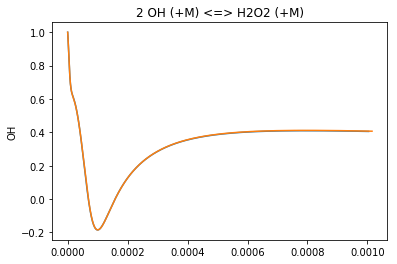

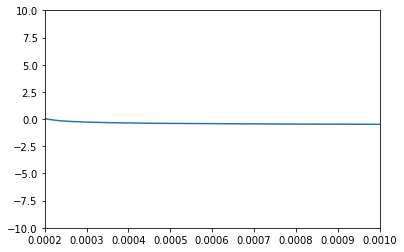

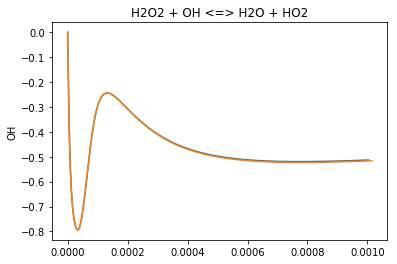

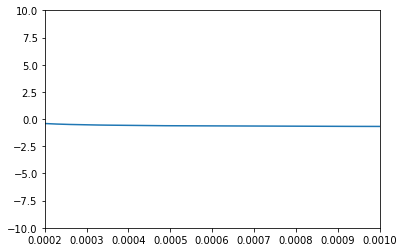

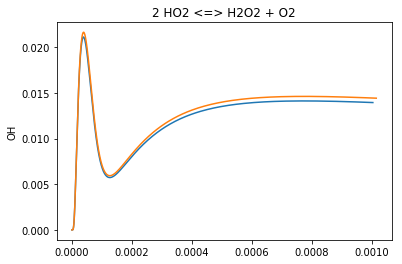

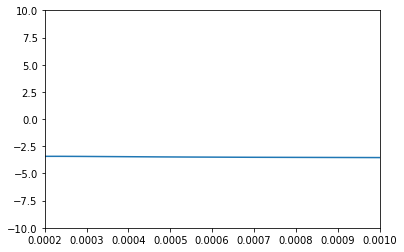

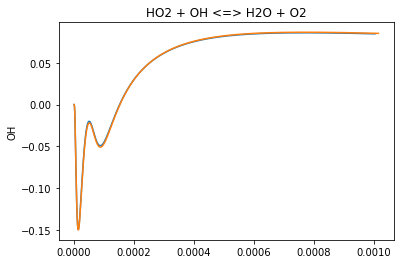

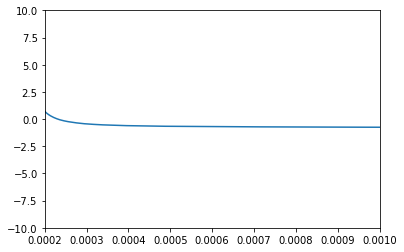

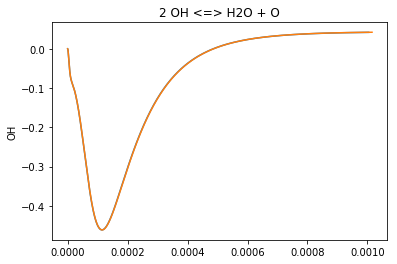

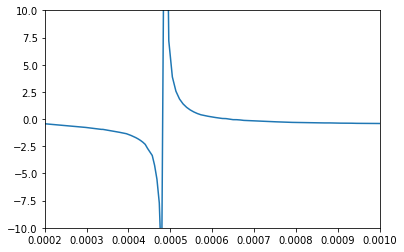

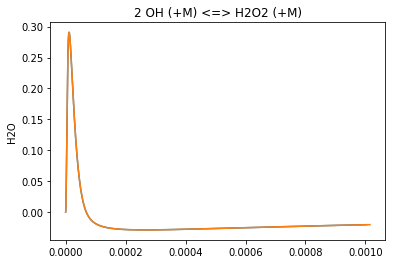

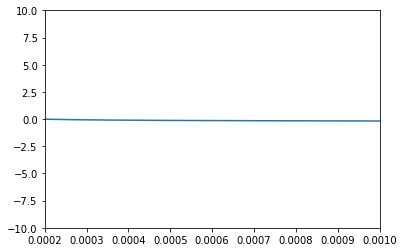

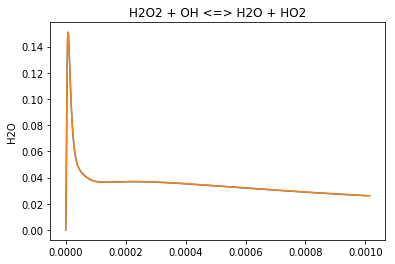

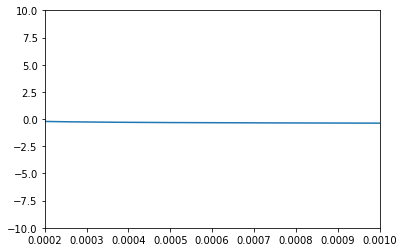

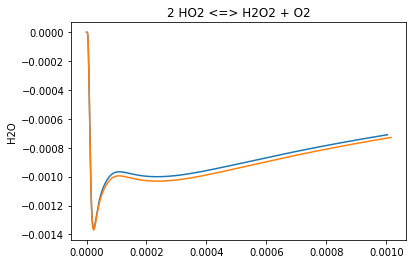

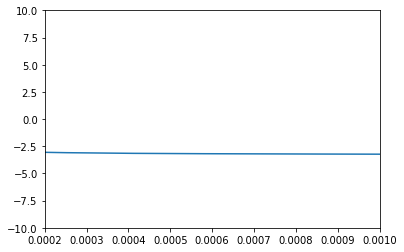

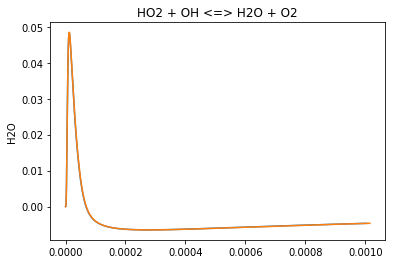

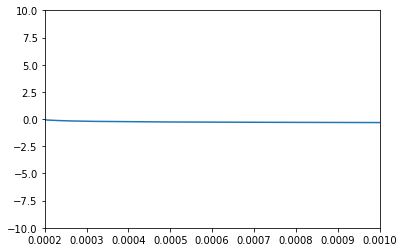

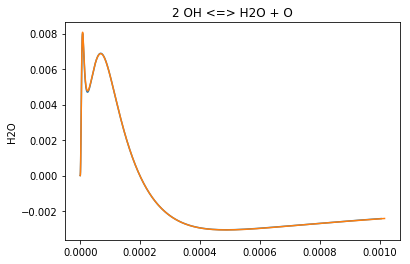

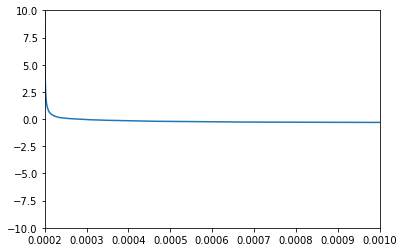

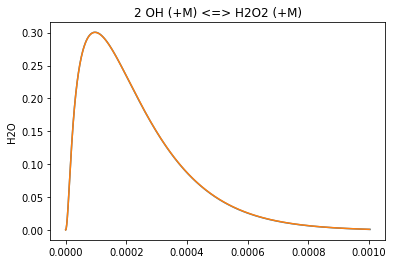

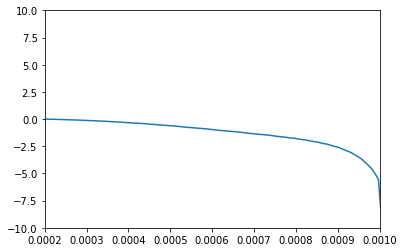

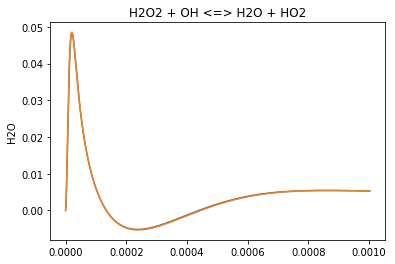

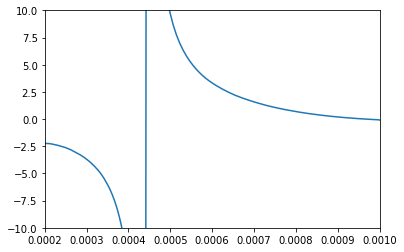

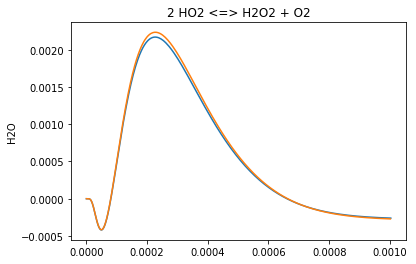

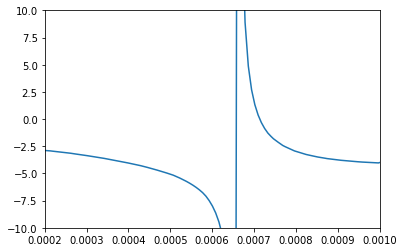

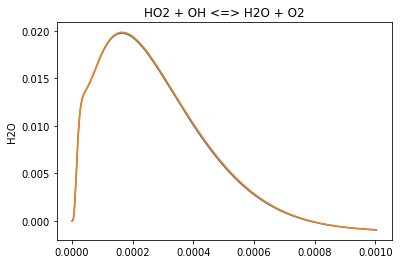

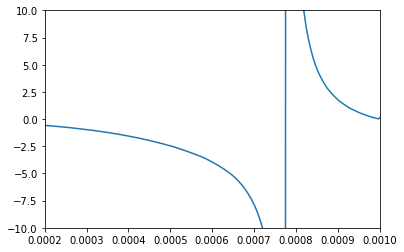

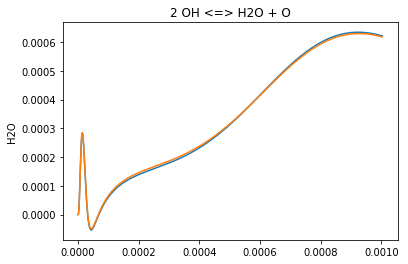

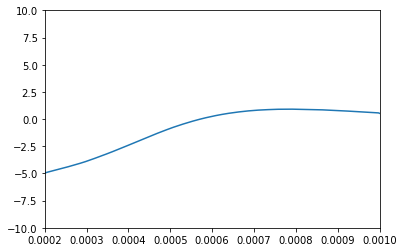

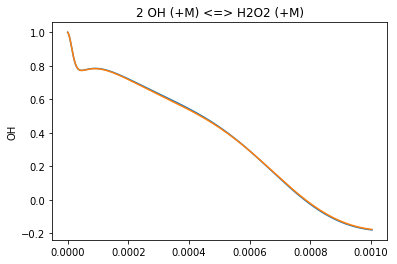

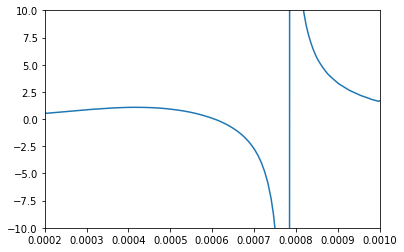

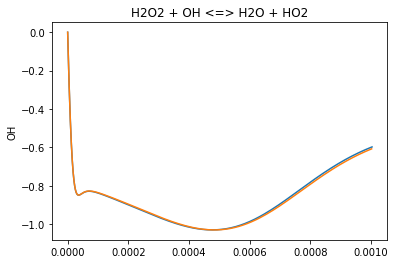

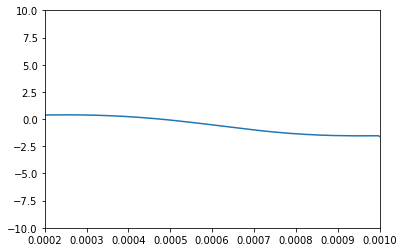

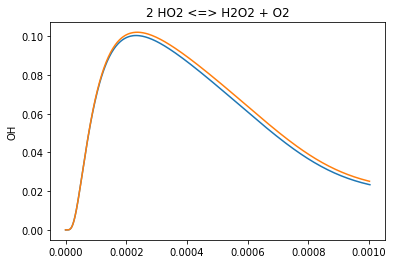

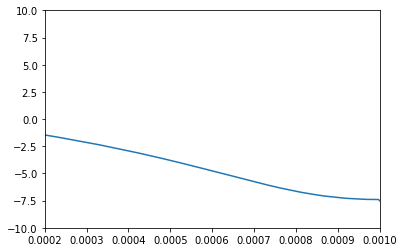

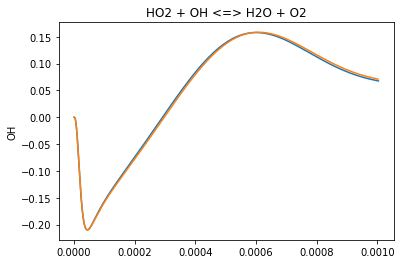

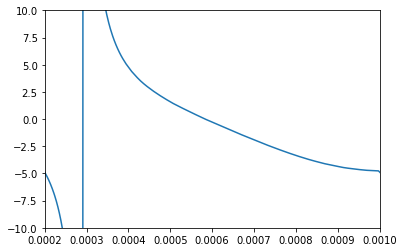

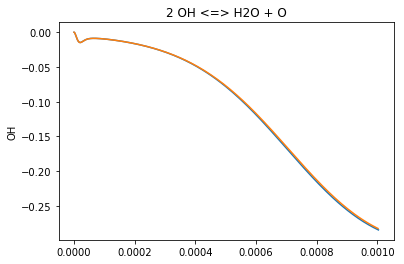

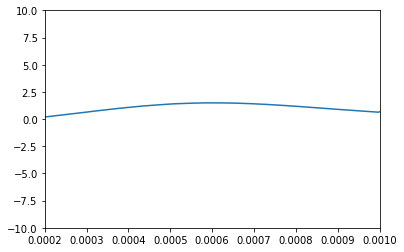

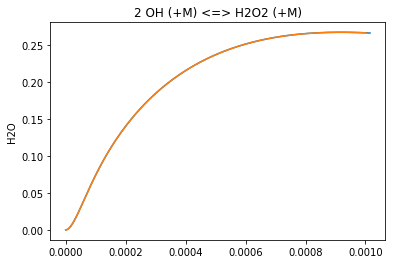

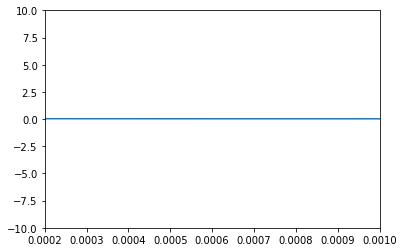

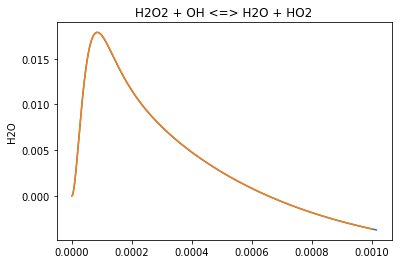

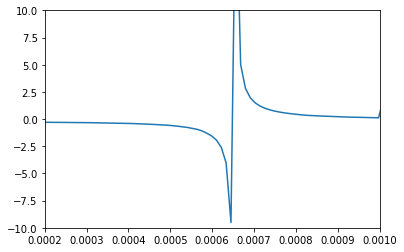

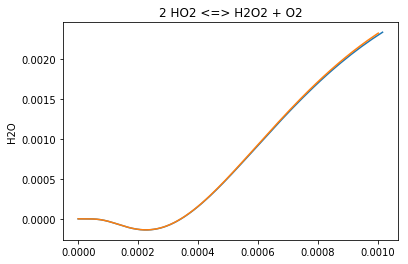

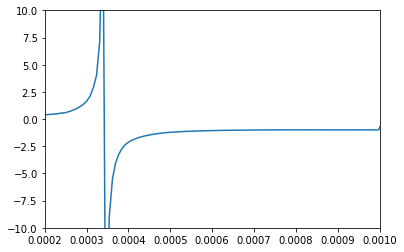

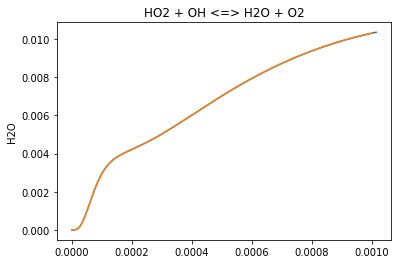

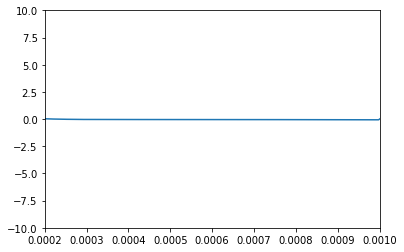

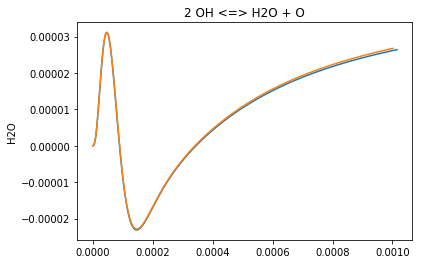

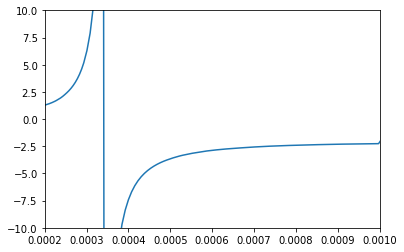

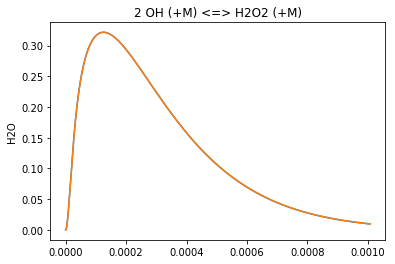

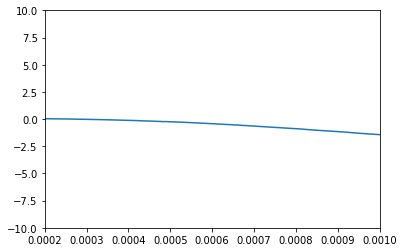

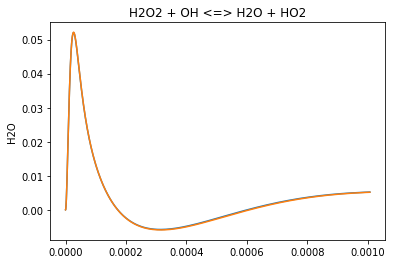

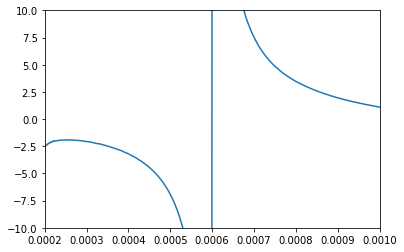

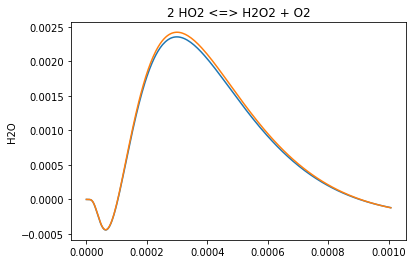

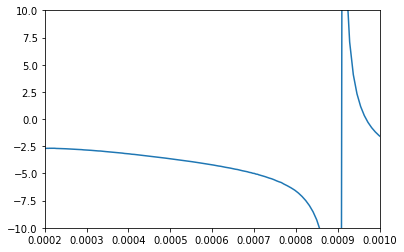

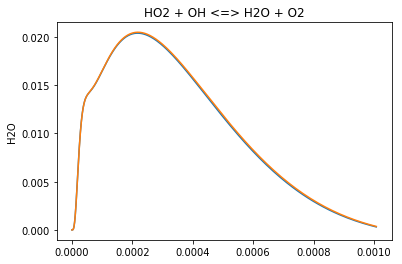

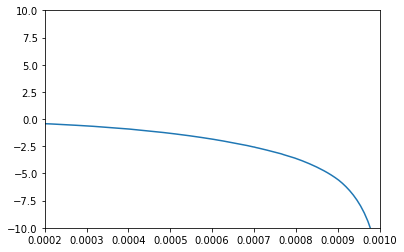

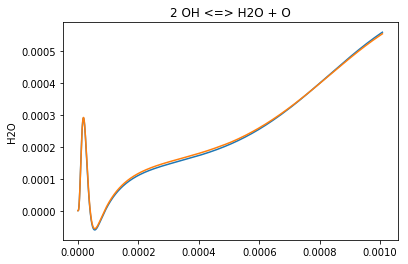

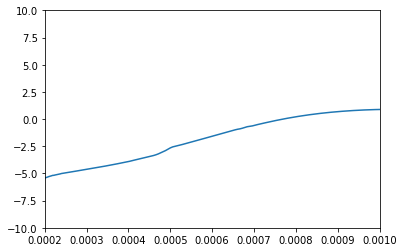

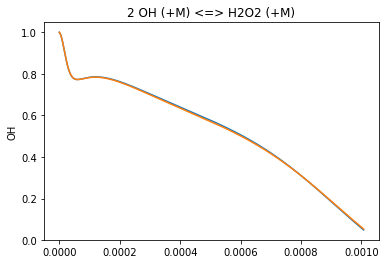

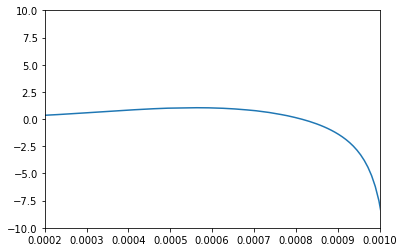

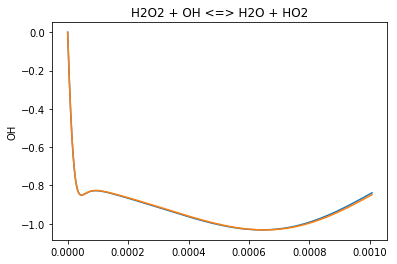

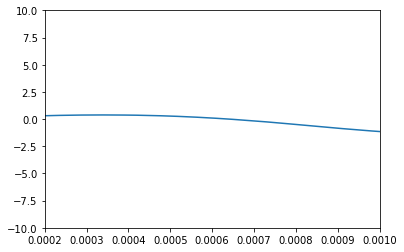

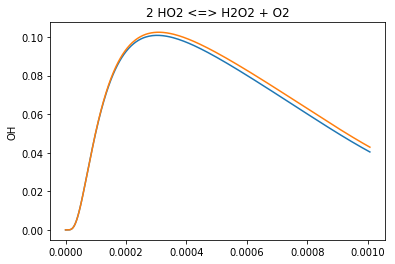

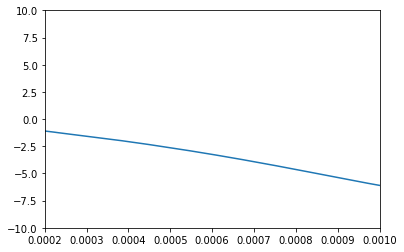

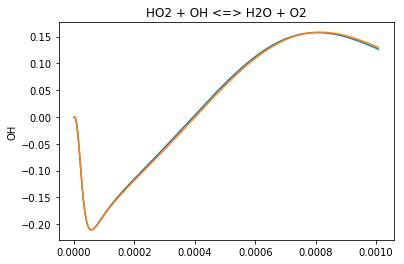

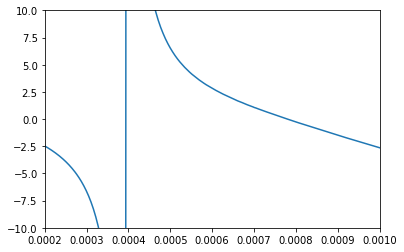

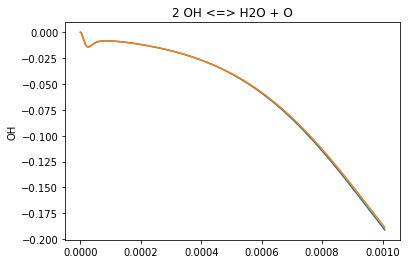

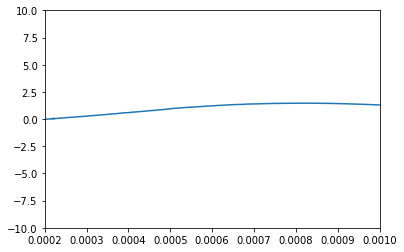

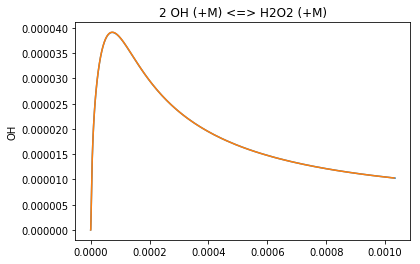

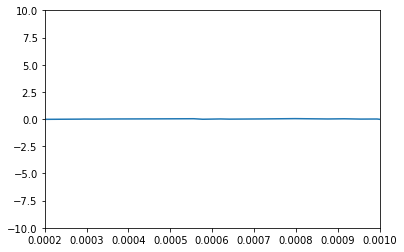

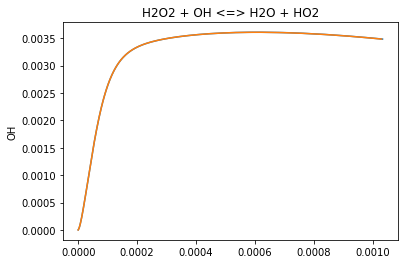

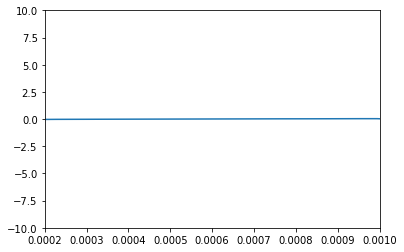

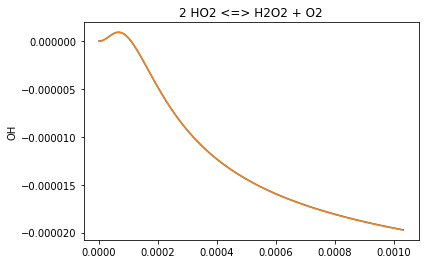

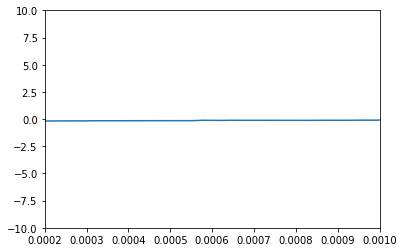

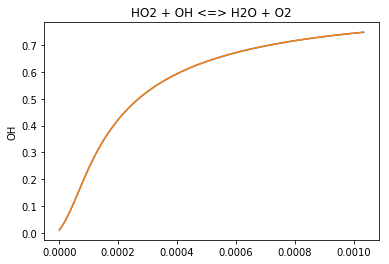

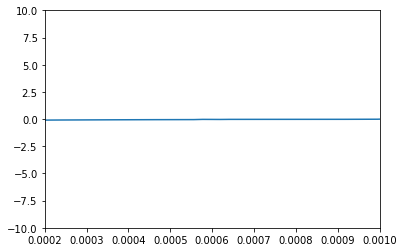

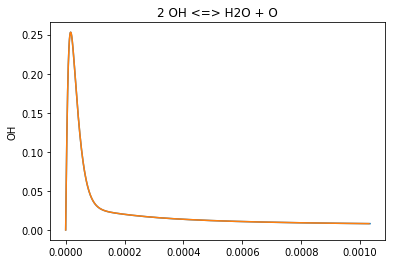

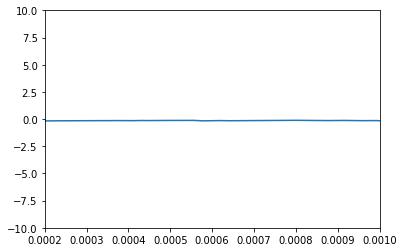

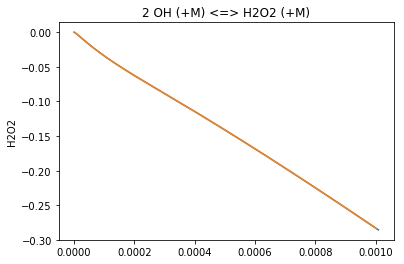

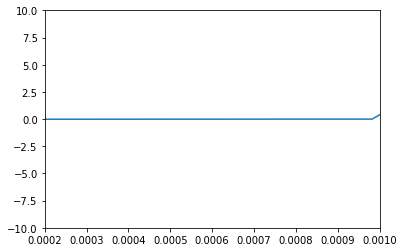

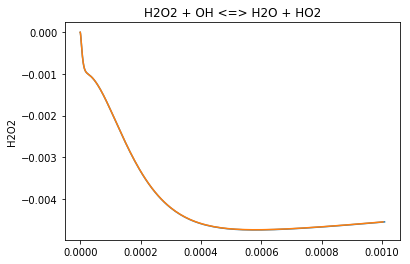

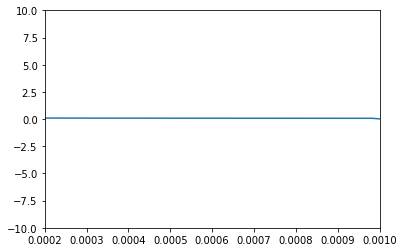

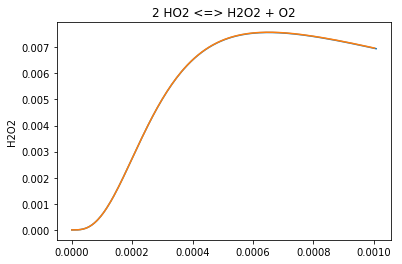

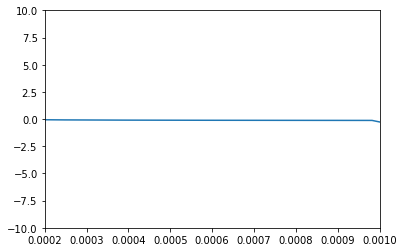

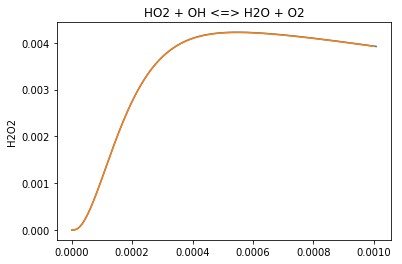

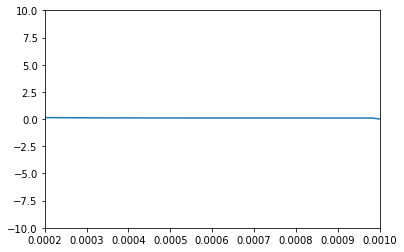

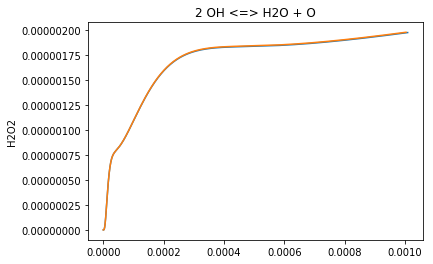

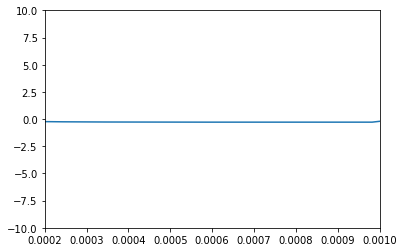

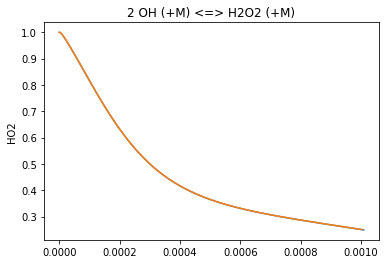

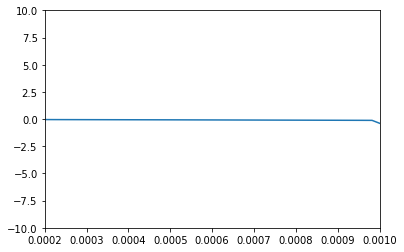

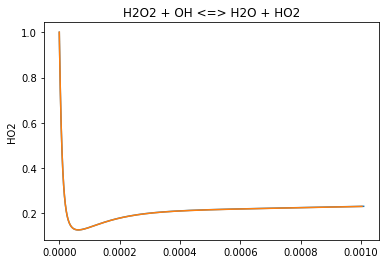

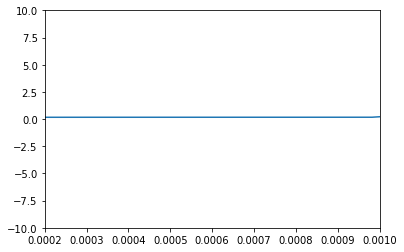

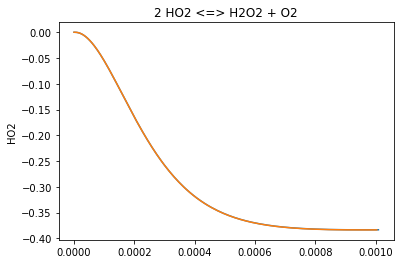

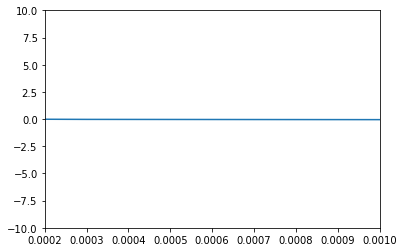

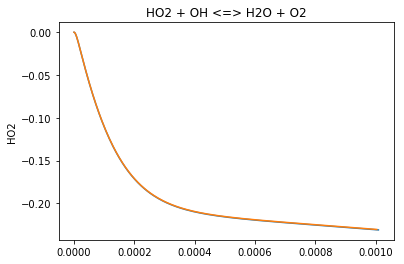

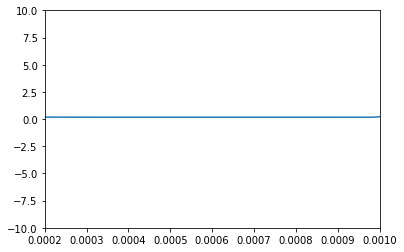

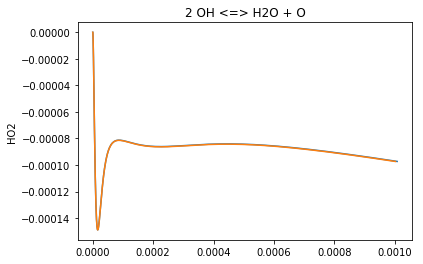

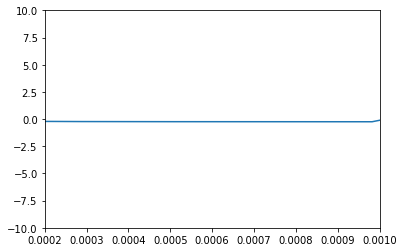

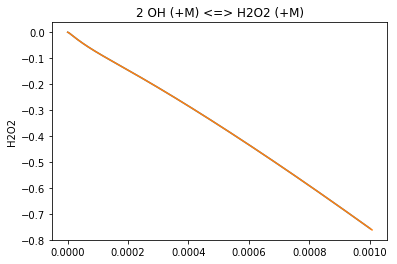

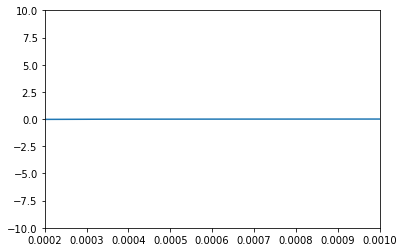

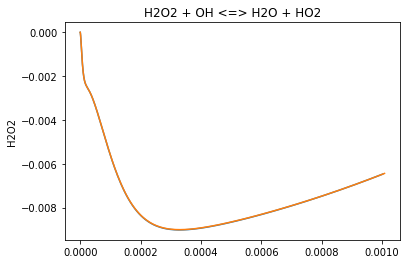

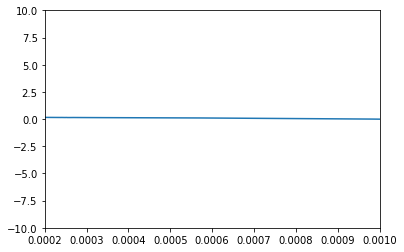

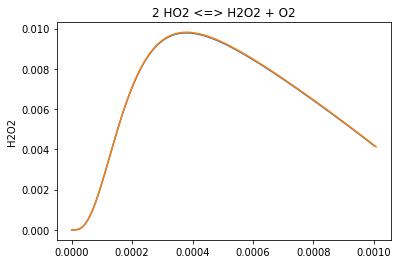

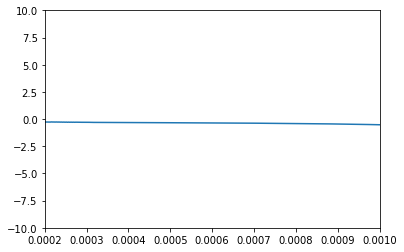

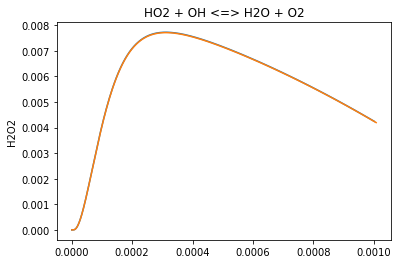

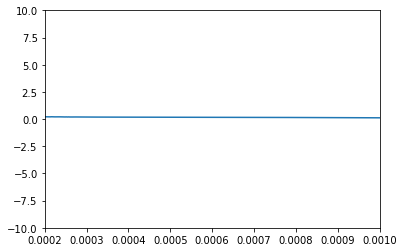

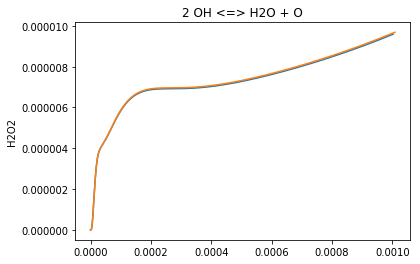

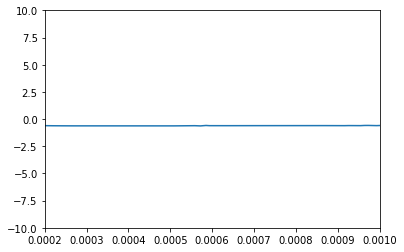

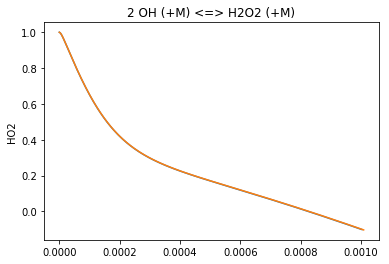

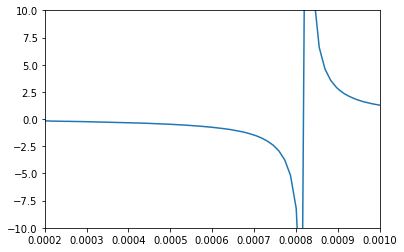

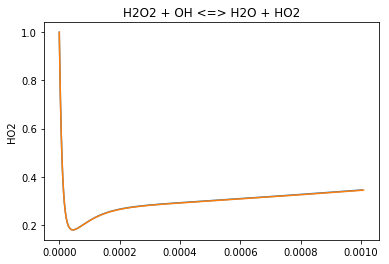

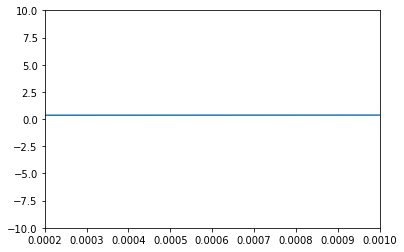

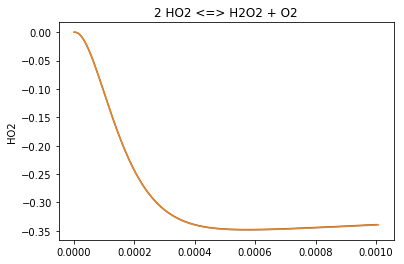

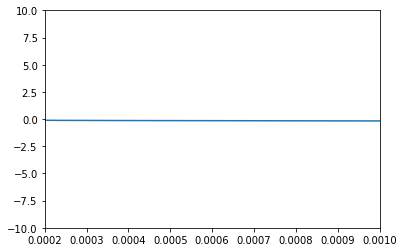

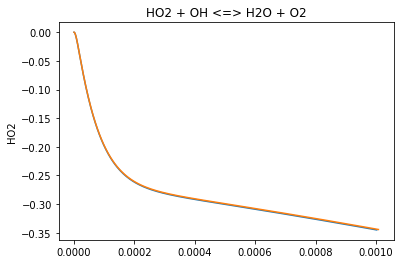

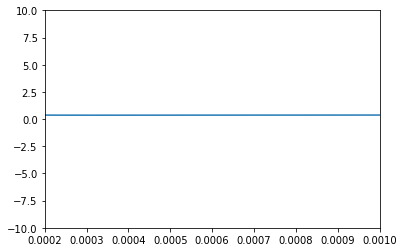

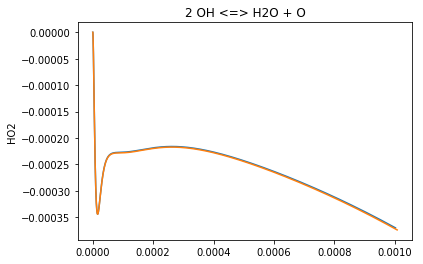

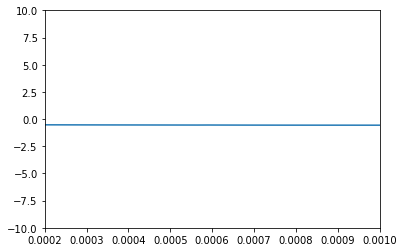

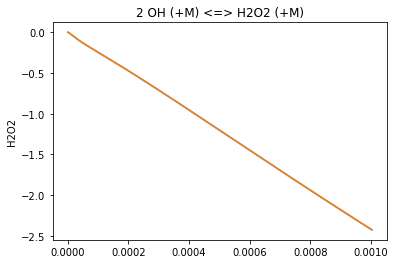

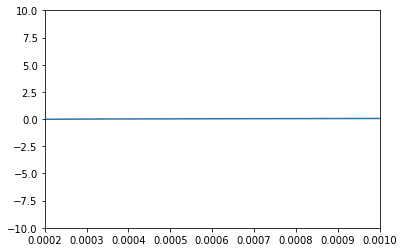

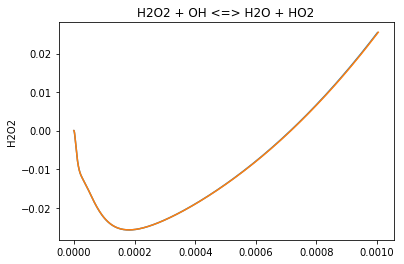

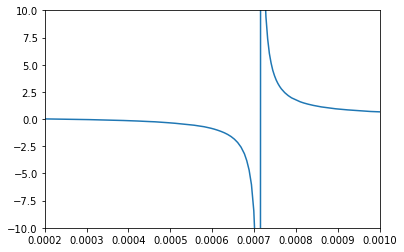

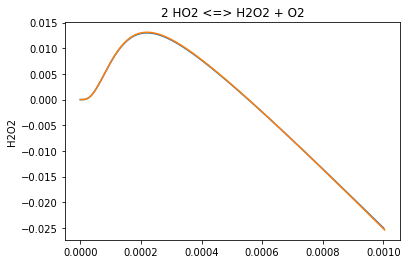

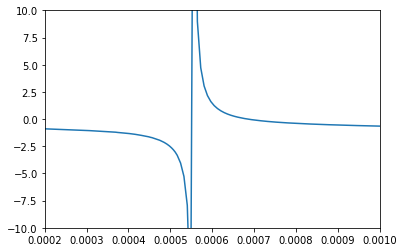

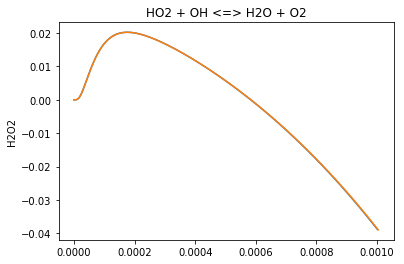

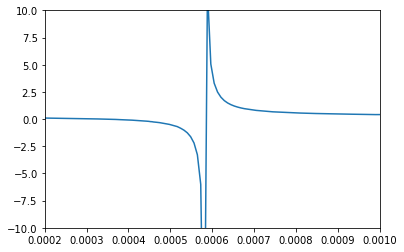

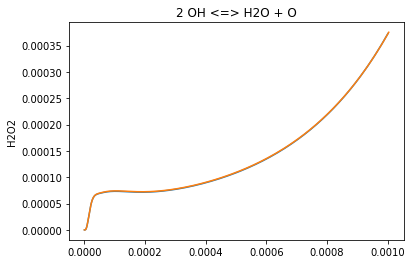

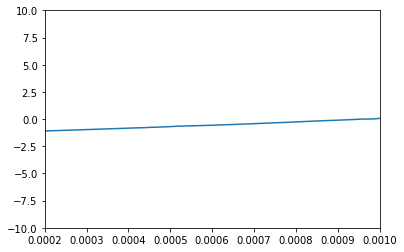

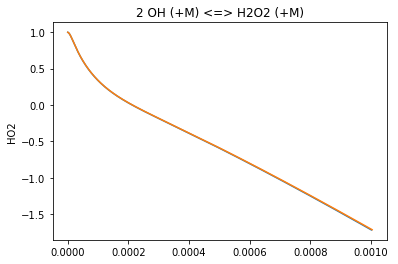

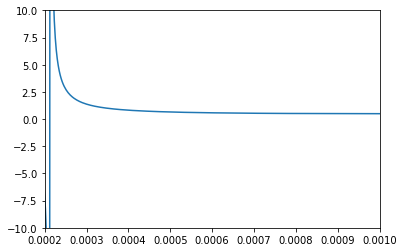

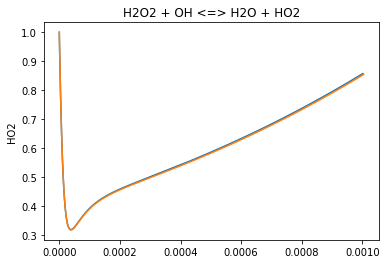

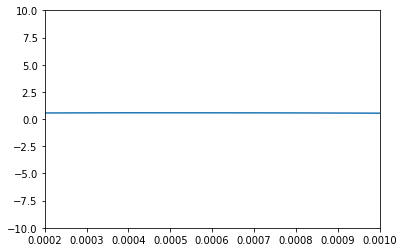

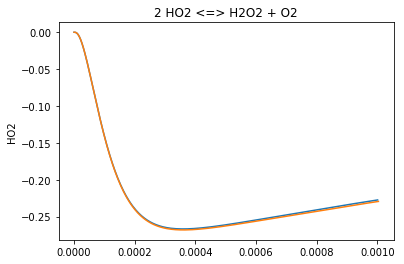

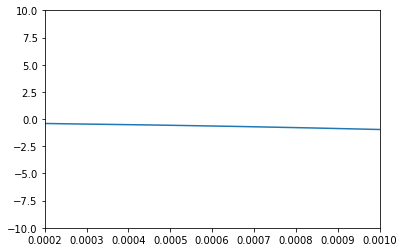

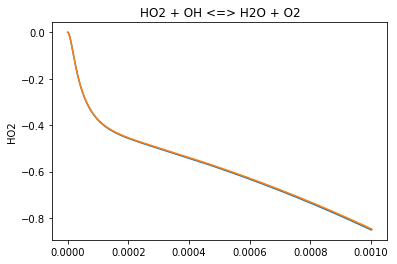

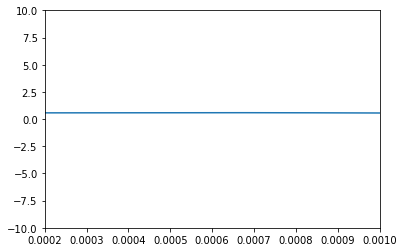

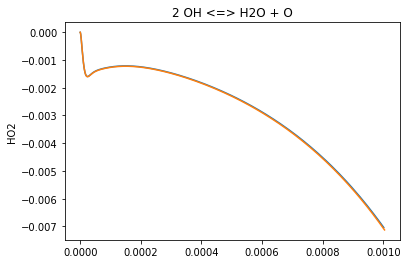

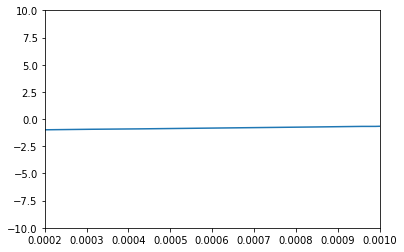

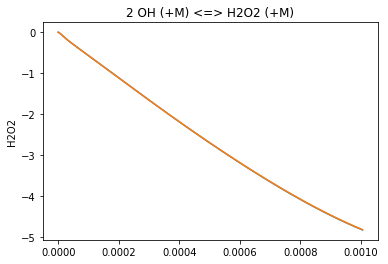

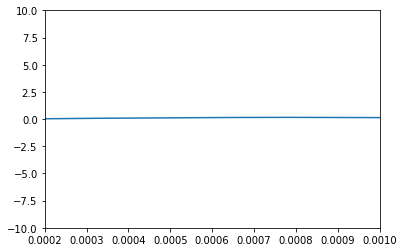

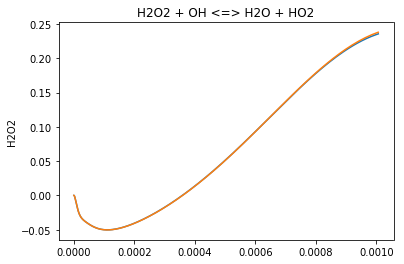

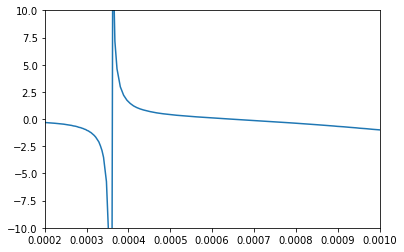

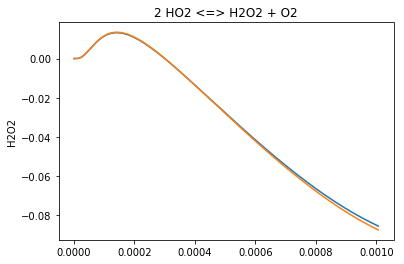

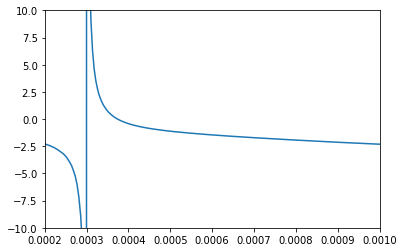

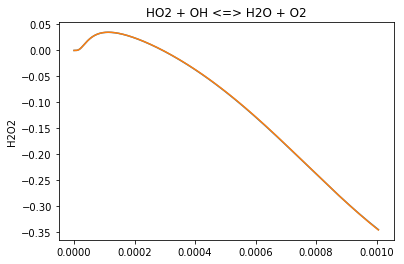

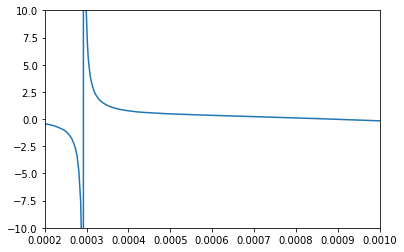

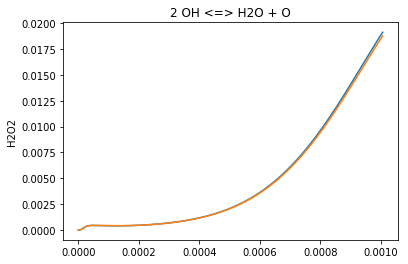

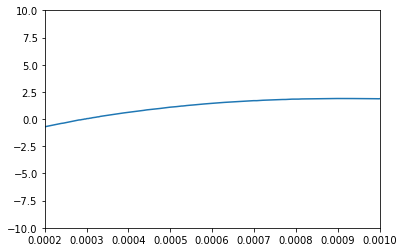

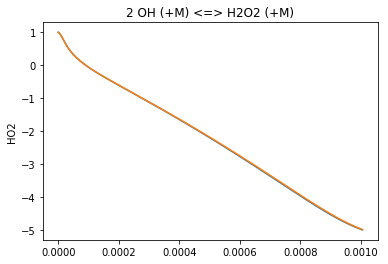

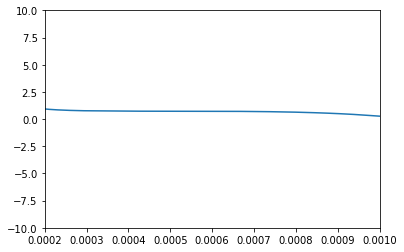

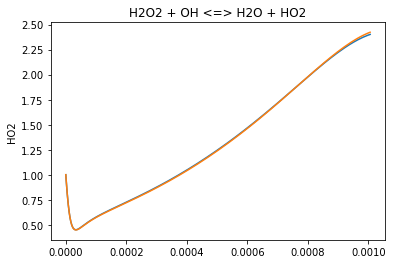

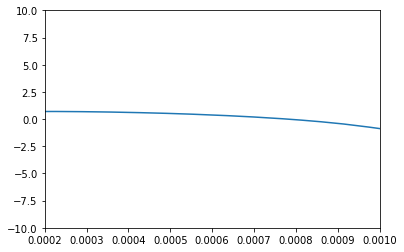

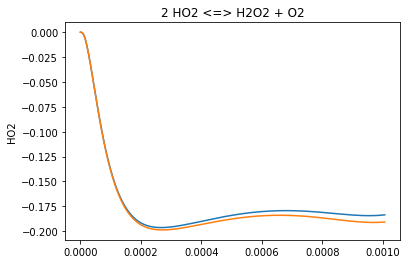

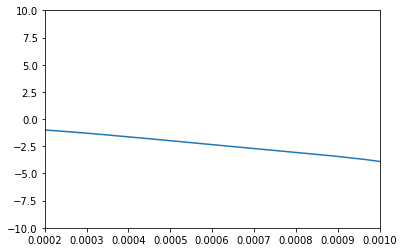

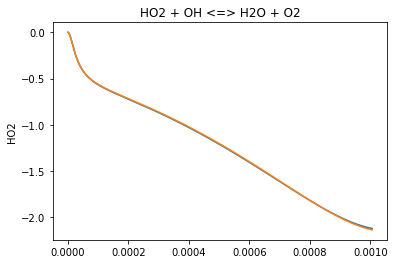

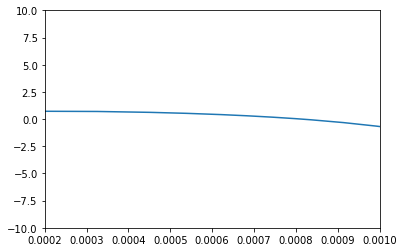

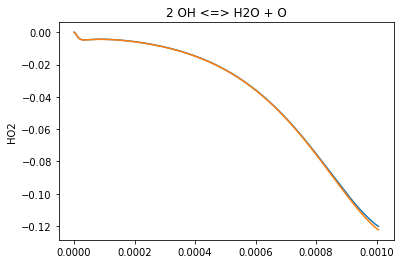

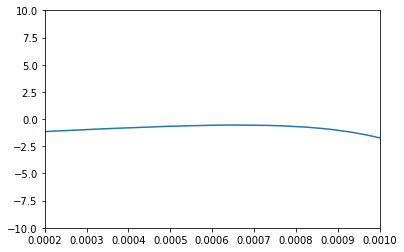

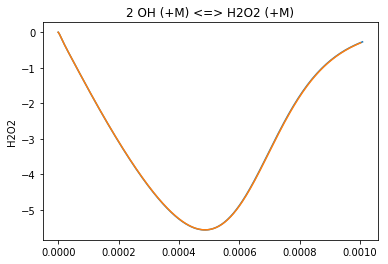

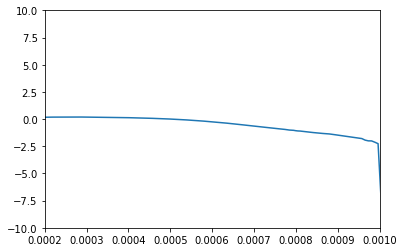

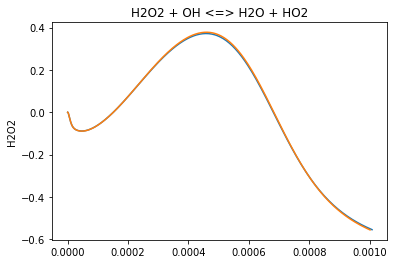

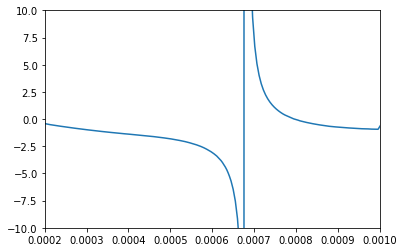

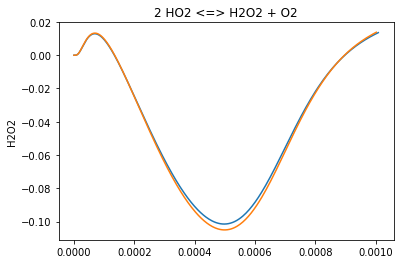

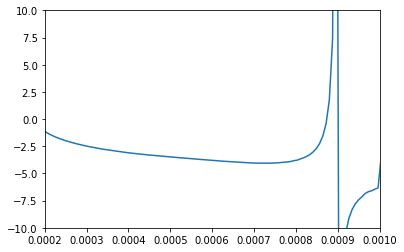

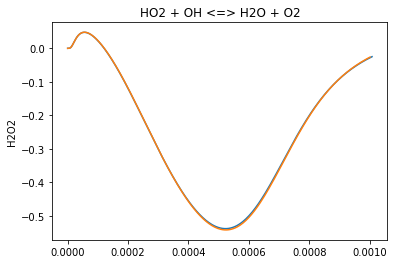

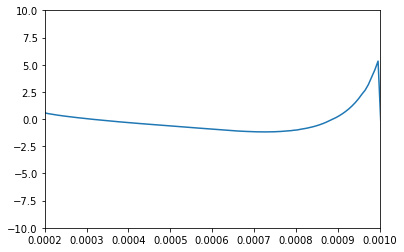

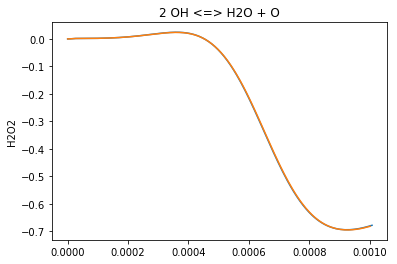

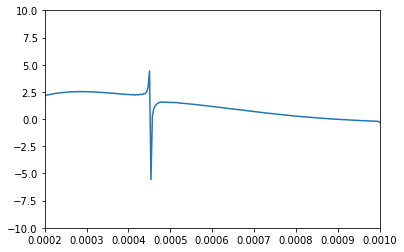

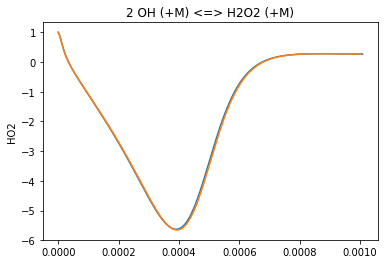

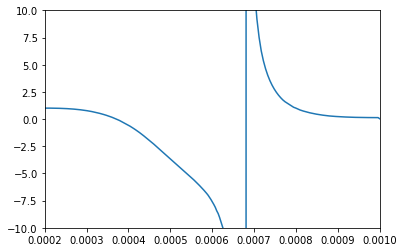

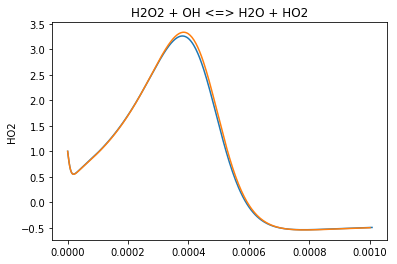

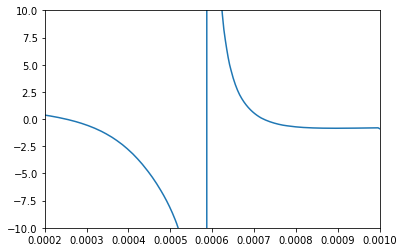

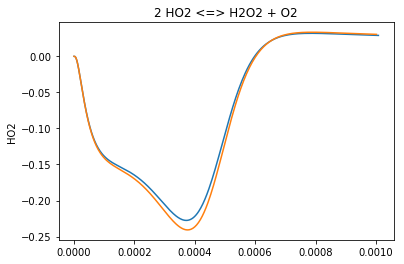

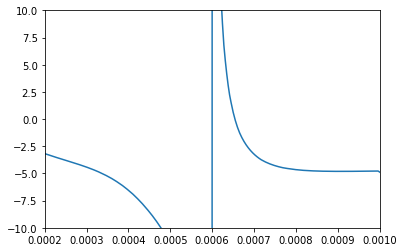

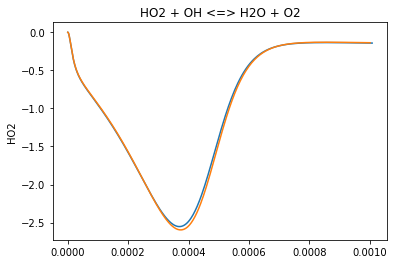

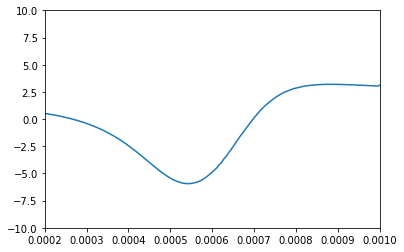

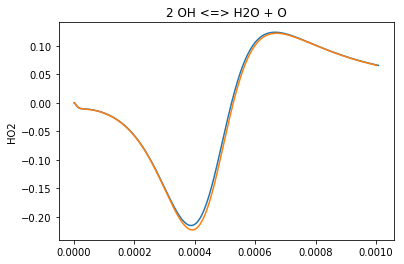

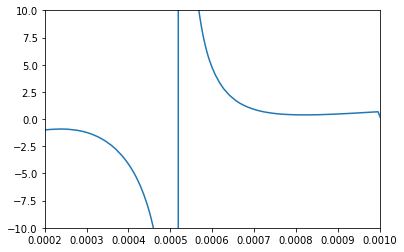

In [80]:
pressures_list=[1.909,1.95,1.83,1.672,1.74,3.59,3.298,3.44187,3.55,3.038]
temperatures_list=[1398,1192,1057,1182,1880,968,1015,1079,1132,1218]
conditions_list=[{'H2O':0.001234,'H2O2': 0.00254 ,'O2':0.00062,'Ar':0.995606},
            {'H2O':0.001364,'H2O2': 0.002216 ,'O2':0.000682,'Ar':0.995738},
            {'H2O':0.000663,'H2O2': 0.00086 ,'O2':0.000332,'Ar':0.998145},
            {'H2O':0.001113,'H2O2': 0.002046  ,'O2':0.000556,'Ar':0.996285},
            {'H2O':0.013,'O2':.0099 ,'H':.0000007,'Ar':0.9770993},
            {'H2O2':0.00314,'Ar':0.99686},
            {'H2O2':0.00325758,'Ar':0.99674242},
            {'H2O2':0.00195373,'Ar':0.99804627},
            {'H2O2':0.001361,'Ar':0.998639},
            {'H2O2':0.00171053,'Ar':0.99828947}
                                     ]
observables_list = [['OH','H2O'],
               ['H2O','OH'],
               ['H2O'],
               ['H2O','OH'],
               ['OH'],
               ['H2O2','HO2'],
               ['H2O2','HO2'],
               ['H2O2','HO2'],
               ['H2O2','HO2'],
               ['H2O2','HO2']]
for xx,temp in enumerate(temperatures_list):
    timeHistory_adaptable_cheb,kineticSensitivities_adaptable_cheb,observables = shock_tube_sensitivity_calculation(temperature=temp,
                                           pressure=pressures_list[xx]*101325,
                                           conditions=conditions_list[xx],
                                           mechanicalBoundary='constant pressure',
                                           cti='FFCM1_custom_cheb_test_extra_zeros.cti',
                                           initialTime=0,
                                           finalTime=.001,
                                           observables=observables_list[xx],
                                           kineticSens=1)



    timeHistory_adaptable_spf,kineticSensitivities_adaptable_spf,observables = shock_tube_sensitivity_calculation(temperature=temp,
                                           pressure=pressures_list[xx]*101325,
                                           conditions=conditions_list[xx],
                                           mechanicalBoundary='constant pressure',
                                           cti='FFCM1_custom.cti',
                                           initialTime=0,
                                           finalTime=.001,
                                           observables=observables_list[xx],
                                           kineticSens=1)
    reactions = gas.reaction_equations()
    for i,obs in enumerate(observables_list[xx]):
        for react in range(5):
            reaction_chevy = kineticSensitivities_adaptable_cheb[:,:,i]  
            reaction_chevy = reaction_chevy[:,react]    
            interpolate_chevy = np.interp(timeHistory_adaptable_spf['time'].values,timeHistory_adaptable_cheb['time'].values,reaction_chevy)

            reaction_spf = kineticSensitivities_adaptable_spf[:,:,i]
            reaction_spf = reaction_spf[:,react]
            plt.figure()
            plt.plot(timeHistory_adaptable_spf['time'].values,reaction_spf)
            plt.plot(timeHistory_adaptable_cheb['time'].values,reaction_chevy)
            plt.title(reactions[react])
            plt.ylabel(obs)



            percent_difference = ((reaction_spf-interpolate_chevy)/reaction_spf)*100
            plt.figure()
            plt.xlim(.0002,.001)
            plt.ylim(-10,10)
            plt.plot(timeHistory_adaptable_spf['time'].values,percent_difference)

In [78]:
pressures_list=[1.909,1.95,1.83,1.672,1.74,3.59,3.298,3.44187,3.55,3.038]
temperatures_list=[1398,1192,1057,1182,1880,968,1015,1079,1132,1218]
conditions_list=[{'H2O':0.001234,'H2O2': 0.00254 ,'O2':0.00062,'Ar':0.995606},
            {'H2O':0.001364,'H2O2': 0.002216 ,'O2':0.000682,'Ar':0.995738},
            {'H2O':0.000663,'H2O2': 0.00086 ,'O2':0.000332,'Ar':0.998145},
            {'H2O':0.001113,'H2O2': 0.002046  ,'O2':0.000556,'Ar':0.996285},
            {'H2O':0.013,'O2':.0099 ,'H':.0000007,'Ar':0.9770993},
            {'H2O2':0.00314,'Ar':0.99686},
            {'H2O2':0.00325758,'Ar':0.99674242},
            {'H2O2':0.00195373,'Ar':0.99804627},
            {'H2O2':0.001361,'Ar':0.998639},
            {'H2O2':0.00171053,'Ar':0.99828947}
                                     ]
observables_list = [['OH','H2O'],
               ['H2O','OH'],
               ['H2O'],
               ['H2O','OH'],
               ['OH'],
               ['H2O2','HO2'],
               ['H2O2','HO2'],
               ['H2O2','HO2'],
               ['H2O2','HO2'],
               ['H2O2','HO2']]
for xx,temp in enumerate(temperatures_list):
    timeHistory_defined_cheb,kineticSensitivities_defined_cheb,observables = shock_tube_sensitivity_calculation_defined_time_step(temperature=temp,
                                           pressure=pressures_list[xx]*101325,
                                           conditions=conditions_list[xx],
                                           mechanicalBoundary='constant pressure',
                                           cti='FFCM1_custom_cheb_test_extra_zeros.cti',
                                           initialTime=0,
                                           finalTime=.001,
                                           observables=observables_list[xx],
                                           kineticSens=1)



    timeHistory_defined_spf,kineticSensitivities_defined_spf,observables = shock_tube_sensitivity_calculation_defined_time_step(temperature=temp,
                                           pressure=pressures_list[xx]*101325,
                                           conditions=conditions_list[xx],
                                           mechanicalBoundary='constant pressure',
                                           cti='FFCM1_custom.cti',
                                           initialTime=0,
                                           finalTime=.001,
                                           observables=observables_list[xx],
                                           kineticSens=1)
    reactions = gas.reaction_equations()
    for i,obs in enumerate(observables_list[xx]):
        for react in range(5):
            reaction_chevy = kineticSensitivities_defined_cheb[:,:,i]  
            reaction_chevy = reaction_chevy[:,react]    
            interpolate_chevy = np.interp(timeHistory_defined_spf['time'].values,timeHistory_defined_cheb['time'].values,reaction_chevy)

            reaction_spf = kineticSensitivities_defined_spf[:,:,i]
            reaction_spf = reaction_spf[:,react]
            plt.figure()
            plt.plot(timeHistory_defined_spf['time'].values,reaction_spf)
            plt.plot(timeHistory_defined_cheb['time'].values,reaction_chevy)
            plt.title(reactions[react])
            plt.ylabel(obs)



            percent_difference = ((reaction_spf-interpolate_chevy)/reaction_spf)*100
            plt.figure()
            plt.plot(timeHistory_defined_spf['time'].values,percent_difference)

KeyboardInterrupt: 